In [334]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
"""设置中文"""
plt.rcParams["font.family"] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #解决保存图像是负号'-'显示为方块的问题

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

%matplotlib inline
sns.set()

# 1、数据探索

In [335]:
data = pd.read_excel(u'./b站分析数据.xlsx')
# data.head(1)
data.sample(5)

,分区,bv,author,mid,date,url,title,coin,danmu,favorite,like,comment,share,view
36659,社科人文,BV1pt411K7NL,太阳星sunstar,11684621.0,2019-08-06 19:05:38,http://www.bilibili.com/video/av62395442,全世界的“战国” ， 割据的世界序幕片 【猩猿崛起04 欧】,9876.0,1370.0,4905.0,27913.0,548.0,268.0,419265.0
12224,社科人文,BV1v7411C7Lj,动动枪DongDongGun,490494088.0,2020-03-26 11:37:38,http://www.bilibili.com/video/av99430149,那些曾经运给中国口罩的国家，现在我们数倍还回去,13848.0,4903.0,4671.0,57891.0,2071.0,575.0,586739.0
33630,汽车,BV1u4411G7Xi,开车大神,40711647.0,2019-06-17 15:26:23,http://www.bilibili.com/video/av55878830,司机开车贴地飞行，街头上演速度激情！,1053.0,703.0,501.0,4882.0,330.0,230.0,181447.0
18591,汽车,BV1aJ41157KC,ARMYTRIX亚洲总部,478570484.0,2020-01-08 12:35:47,http://www.bilibili.com/video/av82539673,低趴宽体奥迪RS6 | ARMYTRIX全段排气 | ADV1轮毂 | 搭上沉稳纳多灰 化身...,273.0,112.0,879.0,919.0,139.0,256.0,60003.0
21902,机械,BV1n741127GB,天下要闻,490498956.0,2020-03-24 17:34:08,http://www.bilibili.com/video/av98948382,这尼玛是未来的科技吧~~~~~星战？？？？？,259.0,681.0,2922.0,9421.0,927.0,688.0,444279.0


In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50129 entries, 0 to 50128
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   分区        50129 non-null  object 
 1   bv        50127 non-null  object 
 2   author    50117 non-null  object 
 3   mid       50127 non-null  float64
 4   date      50126 non-null  object 
 5   url       50126 non-null  object 
 6   title     50123 non-null  object 
 7   coin      50124 non-null  float64
 8   danmu     50124 non-null  float64
 9   favorite  50124 non-null  float64
 10  like      50124 non-null  float64
 11  comment   50124 non-null  float64
 12  share     50124 non-null  float64
 13  view      50124 non-null  float64
dtypes: float64(8), object(6)
memory usage: 5.4+ MB


In [337]:
data["分区"].value_counts()

社科人文            15532
汽车               9638
星海               9419
野生技术协会           7060
科学科普             6756
机械               1719
85814               1
膊Ｕ秸?3532           1
296233              1
563                 1
锤蠹曳窒恚?50        1
Name: 分区, dtype: int64

In [338]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mid,50127.0,1.816982e+08,1.717324e+08,548.0,22009424.00,98205115.0,3.555957e+08,525921242.0
coin,50124.0,4.076449e+03,2.630866e+04,0.0,109.00,510.0,1.990000e+03,2286322.0
danmu,50124.0,1.355064e+03,5.585657e+03,0.0,163.00,395.0,9.780000e+02,322859.0
favorite,50124.0,3.295903e+03,1.513843e+04,0.0,319.00,766.0,2.127000e+03,987108.0
like,50124.0,9.773622e+03,3.311456e+04,0.0,1245.00,3149.0,7.639250e+03,1704113.0
comment,50124.0,8.349861e+02,1.718734e+03,0.0,216.00,403.0,8.250000e+02,49559.0
share,50124.0,9.991845e+02,5.720173e+03,0.0,74.00,196.0,5.460000e+02,373265.0
view,50124.0,2.353938e+05,4.201041e+05,50001.0,72636.75,116652.0,2.299362e+05,13850152.0


In [339]:
#查看缺失值比例
data.isnull().mean()


分区          0.000000
bv          0.000040
author      0.000239
mid         0.000040
date        0.000060
url         0.000060
title       0.000120
coin        0.000100
danmu       0.000100
favorite    0.000100
like        0.000100
comment     0.000100
share       0.000100
view        0.000100
dtype: float64

初步探索结果：
- 去重、去空值
- 日期需要进行转换为日期类型

# 2、数据清洗

In [340]:
#删除含有缺失值的行
data.dropna(inplace=True)

In [341]:
#查看缺失值
data.isnull().sum()

分区          0
bv          0
author      0
mid         0
date        0
url         0
title       0
coin        0
danmu       0
favorite    0
like        0
comment     0
share       0
view        0
dtype: int64

In [342]:
data.drop_duplicates(keep="first",inplace=True)

In [343]:
#恢复索引
data.index = range(data.shape[0])

In [344]:
# 变换日期类型
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M')

# 构建IFL模型

IFL模型

I(Interaction_rate)：
I值反映的是平均每个视频的互动率，互动率越高，表明其视频更能产生用户的共鸣，使其有话题感。

I=(总弹幕数+总评论数)/总播放量/统计范围内视频数量

F(Frequence)：
F值表示的是每个视频的平均发布周期，每个视频之间的发布周期越短，说明内容生产者创作视频的时间也就越短，创作时间太长，不是忠实粉丝的用户可能将其遗忘。

F=(统计范围内最晚发布视频时间-最早发布视频时间)/发布视频的数量

L(Like_rate)：
L值表示的是统计时间内发布视频的平均点赞率，越大表示视频质量越稳定，用户对up主的认可度也就越高。

L=(点赞数X1+投币数X2+收藏数X3+分享数X4)/播放量/发布视频数

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48799 entries, 0 to 48798
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   分区        48799 non-null  object        
 1   bv        48799 non-null  object        
 2   author    48799 non-null  object        
 3   mid       48799 non-null  float64       
 4   date      48799 non-null  datetime64[ns]
 5   url       48799 non-null  object        
 6   title     48799 non-null  object        
 7   coin      48799 non-null  float64       
 8   danmu     48799 non-null  float64       
 9   favorite  48799 non-null  float64       
 10  like      48799 non-null  float64       
 11  comment   48799 non-null  float64       
 12  share     48799 non-null  float64       
 13  view      48799 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(5)
memory usage: 5.2+ MB


In [346]:
#构造I
IFL_I = data.groupby(['author'],as_index = False).agg({'bv':'count',
                                                       'danmu':'sum',
                                                       'comment':'sum',
                                                       'share':'sum',
                                                       'view':'sum'}).rename(columns={"bv": "bv_count",
                                                                                      "danmu": "danmus", 
                                                                                      "comment": "comments",
                                                                                      "share":"shares",
                                                                                     "view":"views"})

IFL_I.head()

,author,bv_count,danmus,comments,shares,views
0,915114771,5,152.0,575.0,230.0,528818.0
1,1235623345,1,376.0,394.0,17.0,212872.0
2,18487150435,6,3468.0,5845.0,2118.0,2485203.0
3,--刃舞--,3,472.0,1337.0,271.0,217527.0
4,--猛禽--,1,211.0,163.0,17.0,196078.0


In [347]:
#构造F
IFL_F = data.groupby('author')['date'].agg([np.min,np.max]).reset_index().rename(columns={"amin": "date_min", "amax": "date_max"})

IFL_F.head()

,author,date_min,date_max
0,915114771,2019-07-09 12:56:46,2019-09-11 14:37:43
1,1235623345,2019-08-02 17:23:23,2019-08-02 17:23:23
2,18487150435,2019-04-11 13:44:16,2019-04-11 16:08:06
3,--刃舞--,2019-03-08 23:34:21,2019-08-22 14:51:23
4,--猛禽--,2019-08-02 14:24:46,2019-08-02 14:24:46


In [348]:
#构造L

data['L'] = (data['like'] + data['coin']*2 + data['favorite']*3 + data['share']*4) / data['view']

IFL_L = data.groupby('author')['L'].agg(np.sum).reset_index()

IFL_L.head()

,author,L
0,915114771,0.041226
1,1235623345,0.016489
2,18487150435,0.091997
3,--刃舞--,0.460481
4,--猛禽--,0.005977


In [349]:
I_F = pd.merge(IFL_I,IFL_F, on='author', how='inner')
I_F.head()

,author,bv_count,danmus,comments,shares,views,date_min,date_max
0,915114771,5,152.0,575.0,230.0,528818.0,2019-07-09 12:56:46,2019-09-11 14:37:43
1,1235623345,1,376.0,394.0,17.0,212872.0,2019-08-02 17:23:23,2019-08-02 17:23:23
2,18487150435,6,3468.0,5845.0,2118.0,2485203.0,2019-04-11 13:44:16,2019-04-11 16:08:06
3,--刃舞--,3,472.0,1337.0,271.0,217527.0,2019-03-08 23:34:21,2019-08-22 14:51:23
4,--猛禽--,1,211.0,163.0,17.0,196078.0,2019-08-02 14:24:46,2019-08-02 14:24:46


In [350]:
IFL = pd.merge(I_F,IFL_L, on='author', how='inner')
IFL.head()

,author,bv_count,danmus,comments,shares,views,date_min,date_max,L
0,915114771,5,152.0,575.0,230.0,528818.0,2019-07-09 12:56:46,2019-09-11 14:37:43,0.041226
1,1235623345,1,376.0,394.0,17.0,212872.0,2019-08-02 17:23:23,2019-08-02 17:23:23,0.016489
2,18487150435,6,3468.0,5845.0,2118.0,2485203.0,2019-04-11 13:44:16,2019-04-11 16:08:06,0.091997
3,--刃舞--,3,472.0,1337.0,271.0,217527.0,2019-03-08 23:34:21,2019-08-22 14:51:23,0.460481
4,--猛禽--,1,211.0,163.0,17.0,196078.0,2019-08-02 14:24:46,2019-08-02 14:24:46,0.005977


In [351]:
IFL['I'] = (IFL['danmus']+IFL['comments'])/IFL['views']/IFL['bv_count']
IFL['F'] = (IFL['date_max']-IFL['date_min']).dt.days/IFL['bv_count']
IFL['L'] = IFL['L']/IFL['bv_count']

IFL.tail()

,author,bv_count,danmus,comments,shares,views,date_min,date_max,L,I,F
7128,龙池山阿聪,3,111.0,723.0,261.0,719824.0,2020-01-05 00:02:02,2020-01-05 00:02:02,0.006806,0.000386,0.0
7129,龙猫斌,4,815.0,3242.0,769.0,507884.0,2019-09-15 04:00:48,2020-01-31 18:41:37,0.049765,0.001997,34.5
7130,龙膜隐形车衣旗舰店,2,118.0,582.0,154.0,533005.0,2019-08-12 12:59:01,2019-08-12 12:59:01,0.005512,0.000657,0.0
7131,龙雪傲,1,956.0,125.0,566.0,113605.0,2019-10-15 15:09:02,2019-10-15 15:09:02,0.380133,0.009515,0.0
7132,龙魂人形社,1,43.0,134.0,379.0,53724.0,2019-05-14 18:45:48,2019-05-14 18:45:48,0.141073,0.003295,0.0


In [352]:
IFL_final = IFL[['author', 'I','F','L']]
IFL_final.tail()

,author,I,F,L
7128,龙池山阿聪,0.000386,0.0,0.006806
7129,龙猫斌,0.001997,34.5,0.049765
7130,龙膜隐形车衣旗舰店,0.000657,0.0,0.005512
7131,龙雪傲,0.009515,0.0,0.380133
7132,龙魂人形社,0.003295,0.0,0.141073


In [353]:
IFL_final.describe().T

,count,mean,std,min,25%,50%,75%,max
I,7133.0,0.004238,0.006164,0.0,0.001090,0.002458,0.005231,0.156047
F,7133.0,7.350853,17.675589,0.0,0.000000,0.000000,5.875000,223.000000
L,7133.0,0.117477,0.156372,0.0,0.021378,0.055876,0.151517,1.648348


### 特征归一化

In [354]:
df_ifl=IFL_final.drop(columns=['author'])
X = MinMaxScaler().fit_transform(df_ifl)
df_ifl_scaled = pd.DataFrame(data=X, columns=list(df_ifl.columns))

df_ifl_scaled.head()

,I,F,L
0,0.001762,0.057399,0.005002
1,0.023180,0.000000,0.010003
2,0.004002,0.000000,0.009302
3,0.017764,0.248132,0.093120
4,0.012223,0.000000,0.003626


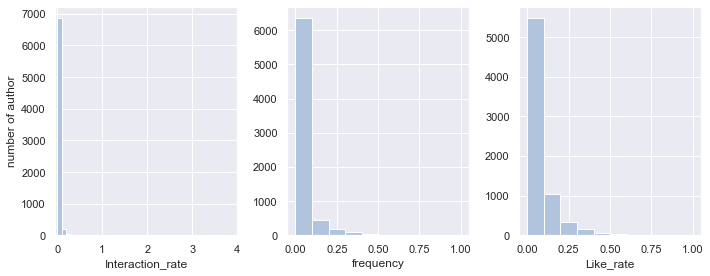

In [355]:
# visualize the distribution of "Interaction_rate", "Frequency", and "Like_rate"
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,4))

# plot "Interaction_rate"
ax1.hist(df_ifl_scaled['I'],bins=10,color='lightsteelblue')
ax1.set_xticks(np.arange(0,5,1))
ax1.set_xlabel('Interaction_rate')
ax1.set_ylabel('number of author')

# plot "Frequency"
ax2.hist(df_ifl_scaled['F'],bins=10,color='lightsteelblue')
ax2.set_xlabel('frequency')


# plot "Like_rate"
ax3.hist(df_ifl_scaled['L'],bins=10,color='lightsteelblue')
ax3.set_xlabel('Like_rate')


plt.tight_layout()

In [356]:
df_ifl_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
I,7133.0,0.027159,0.039503,0.0,0.006983,0.015751,0.033519,1.0
F,7133.0,0.032963,0.079263,0.0,0.000000,0.000000,0.026345,1.0
L,7133.0,0.071270,0.094866,0.0,0.012969,0.033898,0.091921,1.0


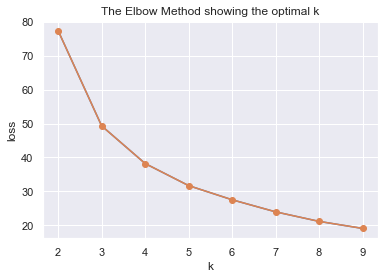

In [357]:
# 肘部法则--求解合适的K
loss = []
K = range(2,10)
for i in K:
    model = KMeans(n_clusters=i,random_state=99).fit(df_ifl_scaled)
    loss.append(model.inertia_)
    
plt.plot(K,loss)
plt.xlabel('k')
plt.ylabel('loss')
plt.title('The Elbow Method showing the optimal k')
plt.plot(K,loss,'o-')
plt.show()

In [358]:
# 使用轮廓系数法
from sklearn.metrics import silhouette_score

score_list = list()
silhouette_int = -1
for n_clusters in range(2,10):
    model_kmeans = KMeans(n_clusters=n_clusters)  #建立聚类模型对象
    labels_tmp = model_kmeans.fit_predict(df_ifl_scaled)  #训练聚类模型
    silhouette_tmp = silhouette_score(df_ifl_scaled, labels_tmp)  #得到每个K下的平均轮廓系数
    if silhouette_tmp > silhouette_int:  #如果平均轮廓系数更高
        best_k = n_clusters  #保存最佳的K值
        silhouette_int = silhouette_tmp
        best_kmeans = model_kmeans  #保存模型实例对象
        cluster_labels_k = labels_tmp  #保存聚类标签
    score_list.append([n_clusters, silhouette_tmp])  #将每次K值及其平均轮廓系数记录

print(score_list)
print('最优的K值是：{0} \n对应的轮廓系数是{1}'.format(best_k, silhouette_int))

[[2, 0.5847778589176927], [3, 0.6205063323143789], [4, 0.5275901663672736], [5, 0.5337438172205685], [6, 0.5433272162509263], [7, 0.47772739209986675], [8, 0.4913603872068035], [9, 0.43737626422521136]]
最优的K值是：3 
对应的轮廓系数是0.6205063323143789


In [359]:
#采用k-measn聚类算法对客户数据进行客户分群，聚成3类
kmodel = KMeans(n_clusters=3,random_state=99)
kmodel.fit(df_ifl_scaled)

KMeans(n_clusters=3, random_state=99)

In [360]:
kmodel.cluster_centers_   #查看聚类中心

array([[0.01517841, 0.27739176, 0.07454979],
       [0.02535494, 0.01538053, 0.03993332],
       [0.04468698, 0.0201879 , 0.26823812]])

In [361]:
kmodel.labels_ #查看样本对应类别

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

In [362]:
df_ifl_scaled['labels'] = kmodel.labels_  
df_ifl_scaled.head()

,I,F,L,labels
0,0.001762,0.057399,0.005002,1
1,0.023180,0.000000,0.010003,1
2,0.004002,0.000000,0.009302,1
3,0.017764,0.248132,0.093120,0
4,0.012223,0.000000,0.003626,1


In [363]:
#查看各类别客户群人数
df_ifl_scaled.groupby('labels')['labels'].count()

labels
0     461
1    5763
2     909
Name: labels, dtype: int64

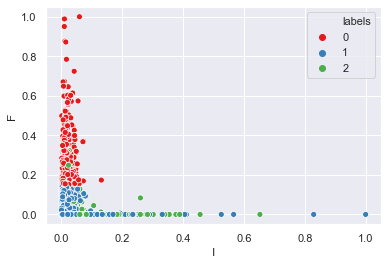

In [364]:
plt.rcParams["font.family"] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #解决保存图像是负号'-'显示为方块的问题
sns.scatterplot(x="I", y="F", hue="labels", data =df_ifl_scaled, palette='Set1')

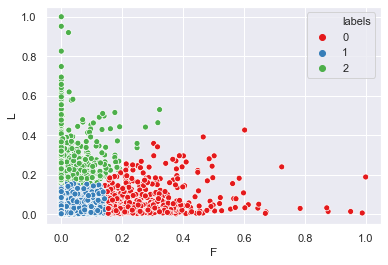

In [365]:
sns.scatterplot(x="F", y="L", hue="labels", data =df_ifl_scaled, palette='Set1')

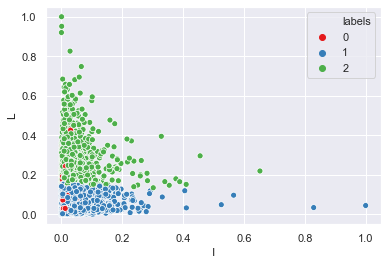

In [366]:
sns.scatterplot(x="I", y="L", hue="labels", data =df_ifl_scaled, palette='Set1')

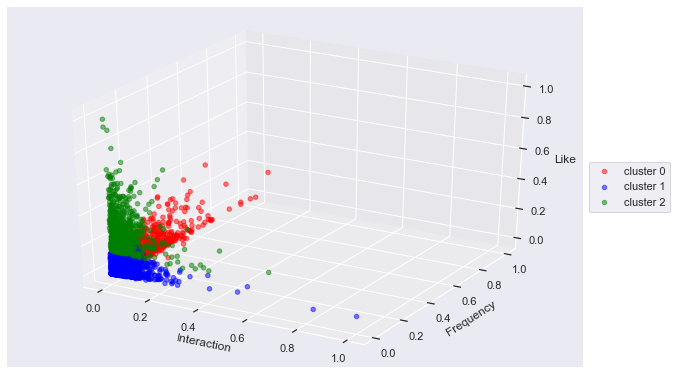

In [367]:
from mpl_toolkits.mplot3d import Axes3D
# step 4_1: data preparation
I=[]
F=[]
L=[]
mycolors=['red','blue','green']
#cluster_orders=[3,2,0,1]
for i in range(3):
    I.append(df_ifl_scaled.loc[df_ifl_standardize.labels==i,'I'].values.tolist())
    F.append(df_ifl_scaled.loc[df_ifl_standardize.labels==i,'F'].values.tolist())
    L.append(df_ifl_scaled.loc[df_ifl_standardize.labels==i,'L'].values.tolist())
    
# step 4_2: 3D scatter plot
fig=plt.figure(figsize=(8,5))
ax=Axes3D(fig)
for i in range(3):
    #ax.scatter(I[i], F[i], L[i], cmap='Set1',marker='o',alpha=0.5,label='cluster '+str(i))
    ax.scatter(I[i], F[i], L[i],c=mycolors[i],marker='o',alpha=0.5,label='cluster '+str(i))
ax.set_xlabel('Interaction')
ax.set_ylabel('Frequency')
ax.set_zlabel('Like')
#ax.set_xlim(0,4)
#ax.set_xticks(list(range(4)))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [368]:
# replace k-means cluster names with more meaningful names
d1={0:"Potential up_user", 1:"New up_user", 2: "High Value up_user"}
df_ifl_scaled.loc[:,"segments"]=df_ifl_scaled.loc[:,"labels"].map(d1)

df_ifl_scaled.head()

,I,F,L,labels,segments
0,0.001762,0.057399,0.005002,1,New up_user
1,0.023180,0.000000,0.010003,1,New up_user
2,0.004002,0.000000,0.009302,1,New up_user
3,0.017764,0.248132,0.093120,0,Potential up_user
4,0.012223,0.000000,0.003626,1,New up_user


In [372]:
df_ifl_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
I,7133.0,0.027159,0.039503,0.0,0.006983,0.015751,0.033519,1.0
F,7133.0,0.032963,0.079263,0.0,0.000000,0.000000,0.026345,1.0
L,7133.0,0.071270,0.094866,0.0,0.012969,0.033898,0.091921,1.0
labels,7133.0,1.062807,0.433759,0.0,1.000000,1.000000,1.000000,2.0


In [369]:
df_ifl_scaled['labels'].value_counts()

1    5763
2     909
0     461
Name: labels, dtype: int64

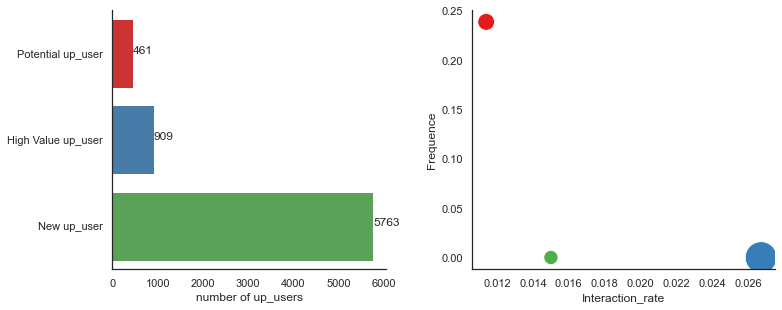

In [378]:
# up主分层可视化
plt.figure(figsize=(10,4))
seg_names=['Potential up_user','High Value up_user','New up_user']

# plot the number of up_authors in each segment
sns.set_style("white")
plt.axes([0, 0, 0.38, 0.9])
seg=df_ifl_scaled.groupby('segments').size().to_frame().rename(columns={0:'number of up_users'}).reset_index()

sns.barplot(x='number of up_users',y='segments',data=seg,order=seg_names,palette='Set1')
for i in range(3):
    number=int(seg.loc[seg.segments==seg_names[i],'number of up_users'])
    x_pos=round(number,2)
    plt.text(x_pos,i,number)   
plt.ylabel("")
sns.despine()

#显示Interaction_rate,Frequence,Like_rate的中值
df_ifl2=df_ifl_scaled.groupby('segments').agg(I=('I',np.median),F=('F',np.median),L=('L',np.median),size=("labels","size")).reset_index()
# df_ifl2=df_ifl_scaled.groupby('segments').agg(I=('I',np.mean),F=('F',np.mean),L=('L',np.mean),size=("labels","size")).reset_index()
plt.axes([0.5,0,0.42,0.9])
sns.scatterplot(x='I',y='F',hue='segments',hue_order=seg_names,palette='Set1',size='L',sizes=(200,1000),legend=False,data=df_ifl2)
plt.xlabel('Interaction_rate')
plt.ylabel('Frequence')
sns.despine()